In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

### Data Preprocessing

In [2]:
X = load_boston().data
Y = load_boston().target
# data overview
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
# data overview
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [4]:
# standardizing data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)
# shape of test and train data matxis
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


### Training and testing the model
scikit-learn’s LinearRegression to train our model on both the training and test
sets.

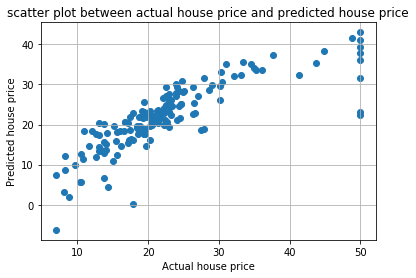

Mean Squared Error : 30.697037704088565
Mean Absolute Error : 3.557668475650041


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

plt.scatter(Y_test,lin_model.predict(X_test))
plt.grid()
plt.xlabel('Actual house price')
plt.ylabel('Predicted house price')
plt.title('scatter plot between actual house price and predicted house price')
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lin_model.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lin_model.predict(X_test)))

### Model evaluation
We will evaluate our model using RMSE and R2-score

In [7]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.366731254717563
R2 score is 0.7611598772034454


The model performance for testing set
--------------------------------------
RMSE is 5.540490745781331
R2 score is 0.6771696999851694


In [8]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


In [9]:
def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual house price and predicted house price')
    plt.xlabel('actual house price')
    plt.ylabel('predicted house price')
    plt.show()

In [10]:
def CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]-1))
        b_temp=0
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur=w_old-learning_rate*w_temp/k
        b_cur=b_old-learning_rate*b_temp/k
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur

In [11]:
# Funtion to get optimal learning rate on the implemented SGD Classifier
from math import log
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)
x1_train = normalizer.transform(x1_train)
x1_cv=normalizer.transform(x1_cv)
x1_train_=np.array(x1_train)
x1_train_data=pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_
x1_cv_data=pd.DataFrame(x1_cv)
x1_cv_data['price']=y1_cv_
y1_train_=np.array(y1_train_)
y1_cv_=np.array(y1_cv_)
#print(y1_cv_.shape)

def tuneParams_learning_rate():
    train_error=[]
    cv_error=[]
    r=[0.00001,0.0001,0.001,0.01,0.1]
    for itr in r:
        w,b=CustomGradientDescentRegressor(x1_train_data,learning_rate=itr,n_itr=1000)
        # print(w.shape,b.shape,x1_train_.shape)
        y1_pred_train=predict(x1_train_,w,b)
        train_error.append(mean_squared_error(y1_train_,y1_pred_train))
        w,b=CustomGradientDescentRegressor(x1_cv_data,learning_rate=itr,n_itr=1000)
        y1_pred_cv=predict(x1_cv,w,b)
        cv_error.append(mean_squared_error(y1_cv_,y1_pred_cv))
    return train_error,cv_error

In [12]:
train_error,cv_error=tuneParams_learning_rate()

### SGD with optimal learning rate

Text(0, 0.5, 'Mean Squared Error')

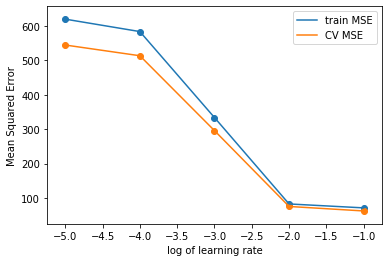

In [13]:
# plotting obtained values
import math
r=[0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error,label='train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')

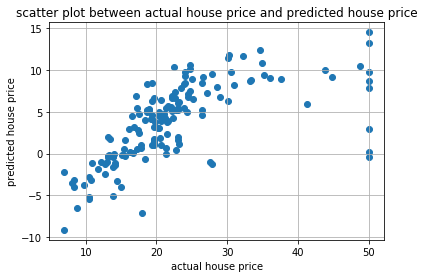

407.0897448317865
18.72037628266577


In [14]:
# running implemented SGD Classifier with obtained optimal learning rate

# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

train_data=pd.DataFrame(X_train)
train_data['price']=Y_train
train_data.head(3)

w,b=CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000)
y_pred=predict(X_test,w,b)
plot_(Y_test,y_pred)

# Errors in implemeted model
print(mean_squared_error(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))

### Comparing Models

In [15]:
from prettytable import PrettyTable
# MSE = mean squared error
# MAE =mean absolute error

# SkLearn SGD classifier predicted weight matrix
sklearn_w=lin_model.coef_
sklearn_w

# weight vector obtained from impemented SGD Classifier
custom_w=w
custom_w

x=PrettyTable()
x.field_names=['Model','Weight Vector','MSE','MAE']
x.add_row(['sklearn',sklearn_w,mean_squared_error(Y_test, lin_model.predict(X_test)),mean_absolute_error(Y_test, lin_model.predict(X_test))])
x.add_row(['custom',custom_w,mean_squared_error(Y_test,y_pred),(mean_absolute_error(Y_test,y_pred))])
print(x)

+---------+---------------------------------------------------------------------------+--------------------+--------------------+
|  Model  |                               Weight Vector                               |        MSE         |        MAE         |
+---------+---------------------------------------------------------------------------+--------------------+--------------------+
| sklearn |  [-1.27363359  0.94438381 -0.17050408  0.18568703 -1.48334986  2.80195533 | 30.697037704088523 | 3.5576684756500456 |
|         |   -0.29987372 -2.72418289  2.77088061 -2.13961719 -2.08896111  1.15085564 |                    |                    |
|         |                                -3.28764536]                               |                    |                    |
|  custom | [[-0.44221964  0.41906133 -0.53858802  0.06924496 -0.42845355  1.01871314 | 407.0897448317865  | 18.72037628266577  |
|         |   -0.42427858  0.20557453 -0.38055787 -0.49631308 -0.67312195  0.36036467 |   

In [16]:
sklearn_pred=lin_model.predict(X_test)
implemented_pred=y_pred
x=PrettyTable()
x.field_names=['SKLearn Linear predicted value','Implemented SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr],implemented_pred[itr]])
print(x)

+--------------------------------+---------------------------------+
| SKLearn Linear predicted value | Implemented SGD predicted value |
+--------------------------------+---------------------------------+
|       37.38997665507024        |        8.887231945314387        |
|       31.567941925266958       |        9.499527309732441        |
|       27.133738856870593       |        6.588559580441435        |
|       6.551176248190249        |        -5.140072254048163       |
|       33.69310848335396        |        9.399331030047158        |
|       5.549193679561011        |        -5.151965111419517       |
|       27.10005629259134        |        5.422311635158753        |
|       29.829809857410336       |        6.8045855572056375       |
|       26.446224206063096       |        5.185713147592359        |
|       22.388735254918274       |        1.1343460206951623       |
|       32.24739998445638        |         8.64744075139054        |
|       21.74892355880308        |